<a href="https://colab.research.google.com/github/PatrickPLi/BayesianCC2019/blob/master/Multivariate_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression
## Predicting House Price from Size and Number of Bedrooms

### Import Libraries

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Read Data

In [0]:
data = np.genfromtxt('https://raw.githubusercontent.com/PatrickPLi/BayesianCC2019/master/data2.txt', delimiter=',')
from google.colab import files
# file = files.upload()
# data = np.genfromtxt(file, delimiter=',')


In [123]:
data.shape
# print(data)

(36, 3)

### Normalize Data

In [0]:
data = normalize(data, axis=0)

### Seperate Data into X and Y

In [0]:
X = data[:, 0:2]
Y = data[:, 2:]

### Visualize the Data

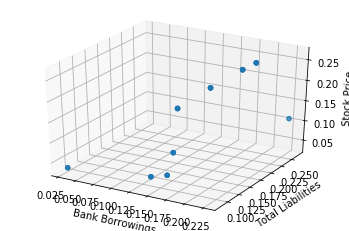

In [91]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Bank Borrowings')
ax.set_ylabel('Total Liabilities')
ax.set_zlabel('Stock Price')

plt.show()

### Hyperparameters

In [0]:
learning_rate = 0.09
max_iteration = 500

In [0]:
s_learning_rate = 0.06
s_max_iteration = 500

In [0]:

mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

### Parameters

In [0]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

### Hypothesis

In [0]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [0]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [0]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent

In [0]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Mini-Batch Gradient Descent

In [0]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Stochastic Gradient Descent

In [0]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Train Model

In [102]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.012111750062416023
iteration :  100  loss :  0.0038873359042951245
iteration :  200  loss :  0.003763234393563464
iteration :  300  loss :  0.003650510849075828
iteration :  400  loss :  0.0035481220045994475


In [103]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.004008289111886591
iteration :  100  loss :  0.0027140435091876705
iteration :  200  loss :  0.002565151303234937
iteration :  300  loss :  0.0025437789719948336
iteration :  400  loss :  0.002539514838333337


In [104]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.008882842968852937
iteration :  100  loss :  0.0038641192334444366
iteration :  200  loss :  0.003582088678914037
iteration :  300  loss :  0.0033649314927520764
iteration :  400  loss :  0.0031972508959399164


### Optimal values of Parameters using Trained Model

In [105]:
theta

array([[0.09894487],
       [0.1280815 ],
       [0.13454828]])

In [106]:
s_theta

array([[-0.01951471],
       [ 0.55953127],
       [ 0.46245619]])

In [107]:
mb_theta

array([[0.07213755],
       [0.26233388],
       [0.25965898]])

### Cost vs Iteration Plots

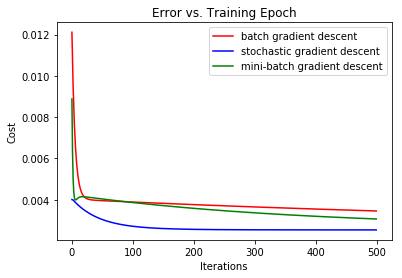

In [108]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

### Visualize the Data

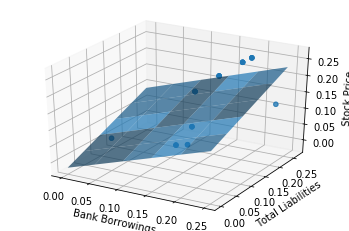

In [109]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Bank Borrowings')
ax.set_ylabel('Total Liabilities')
ax.set_zlabel('Stock Price')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

[[136.12420274]
 [140.1208547 ]]


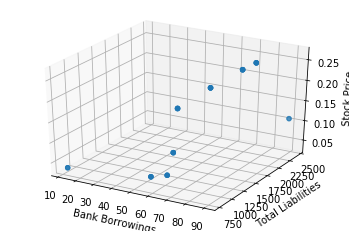

In [121]:
data = np.genfromtxt('https://raw.githubusercontent.com/PatrickPLi/BayesianCC2019/master/data2.txt', delimiter=',')
X = data[:, 0:2]
Y = data
prediction_vals = np.array([[50,2000],
             [100,2000]])
print(h(s_theta,prediction_vals)/7)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
Y = data[:, 2:]
ax.scatter(xs, ys, zs)

ax.set_xlabel('Bank Borrowings')
ax.set_ylabel('Total Liabilities')
ax.set_zlabel('Stock Price')

plt.show()